# 차기 신도시 아파트 공급을 위한 경기도 외각지역 위치 추천 &연도별 아파트 면적 선호도 추이
## 데이터 분석 및 시각화 과정 세미 프로젝트(M조) : 

## [배경] 서울시 생활인구 추이 확인(2018~2023)

#### **처리목적**
- 서울시 공공데이터를 활용하여 최근 6개년 서울의 일별 평균 생활 인구수를 확인

#### **처리사항**
1. 자치구단위 서울생활인구 일별 집계 데이터를 수집
2. 년도별 생활인구수 추출 (2018년~2023년)
3. 결과를 시각화

#### **활용 데이터**
1. KOSIS 국가통계포털 : 자치구단위 서울생활인구 일별 집계표 (https://data.seoul.go.kr/dataList/OA-15379/S/1/datasetView.do)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## 1. 데이터 불러오기

In [4]:
#데이터 불러오기
data = pd.read_csv('Pdata/서울시_생활인구_일수별.csv', encoding='cp949')
data.head(3)

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20230201,11000,서울시,1.109158e+07,1.056832e+07,382631.4555,140630.1604,1.152565e+07,1.070144e+07,1.144363e+07,1.084011e+07,6.141433e+06,1.609427e+06,1.974506e+06,2.557500e+06
1,20230201,11110,종로구,3.156342e+05,2.920504e+05,15144.3895,8439.4291,4.394031e+05,2.218886e+05,4.050167e+05,2.517897e+05,2.843497e+05,8.155447e+04,3.081256e+04,1.719827e+05
2,20230201,11140,중구,3.391822e+05,2.918301e+05,19459.9565,27892.1360,4.964003e+05,2.166010e+05,4.584881e+05,2.539636e+05,3.456269e+05,1.003537e+05,2.850753e+04,2.167657e+05


### 그래프에서 한글지원 되도록 하는 코드 삽입

In [5]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 데이터프레임의 변수 정보 확인

In [6]:
# 데이터 정보확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45526 entries, 0 to 45525
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기준일ID           45526 non-null  int64  
 1   시군구코드           45526 non-null  int64  
 2   시군구명            45526 non-null  object 
 3   총생활인구수          45526 non-null  float64
 4   내국인생활인구수        45526 non-null  float64
 5   장기체류외국인인구수      45526 non-null  float64
 6   단기체류외국인인구수      45526 non-null  float64
 7   일최대인구수          45526 non-null  float64
 8   일최소인구수          45526 non-null  float64
 9   주간인구수(09~18)    45526 non-null  float64
 10  야간인구수(19~08)    45526 non-null  float64
 11  일최대이동인구수        45526 non-null  float64
 12  서울외유입인구수        45526 non-null  float64
 13  동일자치구행정동간이동인구수  45526 non-null  float64
 14  자치구간이동인구수       45526 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 5.2+ MB


## 2. 년도별 서울시 일별 평균 생활인구수 데이터프레임 생성

### 시군구명이 서울시인 행 추출

In [7]:
# 시군구명이 '서울시' 인 행으로만 이루어진 데이터프레임 생성 
data1=data[data['시군구명']=='서울시']
data1
data1.info()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20230201,11000,서울시,11091577.02,10568315.40,382631.4555,140630.1604,11525645.38,10701442.25,11443628.40,10840111.75,6141433.269,1609427.158,1974505.910,2557500.201
26,20230131,11000,서울시,11040045.54,10518814.39,381331.6172,139899.5268,11464894.94,10643224.17,11386192.90,10792797.42,6179308.688,1639698.218,1969180.451,2570430.019
52,20230130,11000,서울시,11014995.24,10490417.00,381979.3859,142598.8541,11434905.99,10635831.97,11358550.36,10769598.73,6126329.889,1627239.850,1966478.209,2532611.830
78,20230129,11000,서울시,10685365.22,10158209.61,384513.0991,142642.5100,10818703.01,10546278.75,10773690.21,10622275.95,4477968.105,1075343.631,1883572.934,1519051.541
104,20230128,11000,서울시,10761553.96,10233241.95,382181.1193,146130.8887,10952571.71,10604725.58,10889130.51,10670427.85,4814124.007,1251421.690,1863193.143,1699509.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45396,20180409,11000,서울시,11714340.23,11120562.22,411823.8641,181954.1524,12055014.52,11362545.49,12001505.09,11509222.48,7287968.585,1645367.887,2514716.763,3127883.935
45422,20180408,11000,서울시,11348961.13,10723031.46,422623.4649,203306.2075,11492611.86,11169683.05,11412671.13,11303454.00,5578693.200,1225405.813,2418676.638,1934610.749
45448,20180407,11000,서울시,11476950.74,10841177.79,414080.6254,221692.3309,11672851.90,11292851.39,11582037.06,11401889.09,6060582.288,1473538.730,2350948.857,2236094.701
45474,20180406,11000,서울시,11761986.13,11147664.84,411175.7222,203145.5656,12097926.96,11407425.72,12040390.25,11563126.04,7183587.001,1643612.981,2452549.376,3087424.644


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 45500
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기준일ID           1751 non-null   int64  
 1   시군구코드           1751 non-null   int64  
 2   시군구명            1751 non-null   object 
 3   총생활인구수          1751 non-null   float64
 4   내국인생활인구수        1751 non-null   float64
 5   장기체류외국인인구수      1751 non-null   float64
 6   단기체류외국인인구수      1751 non-null   float64
 7   일최대인구수          1751 non-null   float64
 8   일최소인구수          1751 non-null   float64
 9   주간인구수(09~18)    1751 non-null   float64
 10  야간인구수(19~08)    1751 non-null   float64
 11  일최대이동인구수        1751 non-null   float64
 12  서울외유입인구수        1751 non-null   float64
 13  동일자치구행정동간이동인구수  1751 non-null   float64
 14  자치구간이동인구수       1751 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 218.9+ KB


### 분석에 필요한 컬럼만 추출

In [8]:
# 필요한 컬럼만으로 새로운 데이터프레임 생성
data_s = data1[['기준일ID','시군구명','총생활인구수']]
data_s

,기준일ID,시군구명,총생활인구수
0,20230201,서울시,11091577.02
26,20230131,서울시,11040045.54
52,20230130,서울시,11014995.24
78,20230129,서울시,10685365.22
104,20230128,서울시,10761553.96
...,...,...,...
45396,20180409,서울시,11714340.23
45422,20180408,서울시,11348961.13
45448,20180407,서울시,11476950.74
45474,20180406,서울시,11761986.13


#### 1) int형으로 되어있는 2023년 생활인구수 평균값 구하기

In [9]:
# 2023년 일별 생활인구수 평균
year23 = data_s[data_s.기준일ID >= 20230000]
year23=(year23.총생활인구수.sum() / len(year23))
year23

10749341.7763125

#### 2) int형으로 되어있는 2022년 생활인구수 평균값 구하기

In [10]:
# 2022년 일별 생활인구수 평균
year22 = data_s[(data_s.기준일ID >= 20220000) & (data_s.기준일ID <= 20230000)]
year22=(year22.총생활인구수.sum() / len(year22))
year22

10841955.707791781

#### 3) int형으로 되어있는 2021년 생활인구수 평균값 구하기

In [11]:
# 2021년 일별 생활인구수 평균
year21=data_s[(data_s.기준일ID >= 20210000) & (data_s.기준일ID <= 20220000)]
year21=(year21.총생활인구수.sum() / len(year21))
year21

10768002.12109589

#### 4) int형으로 되어있는 2020년 생활인구수 평균값 구하기

In [12]:
# 2020년 일별 생활인구수 평균
year20=data_s[(data_s.기준일ID >= 20200000) & (data_s.기준일ID <= 20210000)]
year20=(year20.총생활인구수.sum() / len(year20))
year20

11060398.846789617

#### 5) int형으로 되어있는 2019년 생활인구수 평균값 구하기

In [13]:
# 2019년 일별 생활인구수 평균
year19=data_s[(data_s.기준일ID >= 20190000) & (data_s.기준일ID <= 20200000)]
year19=(year19.총생활인구수.sum() / len(year19))
year19

11286994.720116477

#### 6) int형으로 되어있는 2023년 생활인구수 평균값 구하기

In [14]:
# 2018년 일별 생활인구수 평균
year18=data_s[(data_s.기준일ID >= 20180000) & (data_s.기준일ID <= 20190000)]
year18=(year18.총생활인구수.sum() / len(year18))
year18

11519391.614383765

### 년도별 일별 생활인구수 데이터 프레임 생성

In [15]:
# 년도별 일별 생활인구수 값을 가진 새로운 데이터프레임 생성
data_ss=pd.DataFrame(data=[year18, year19, year20, year21, year22, year23], index=['2018년','2019년','2020년','2021년','2022년','2023년'])
data_ss

,0
2018년,1.151939e+07
2019년,1.128699e+07
2020년,1.106040e+07
2021년,1.076800e+07
2022년,1.084196e+07
2023년,1.074934e+07


### 컬럼명 재지정

In [16]:
# 데이터프레임 컬럼명 변경
# value 실수 소숫점 자리수 수정
data_ss.rename(columns={0:'총 생활인구수'},inplace=True)
data_ss

# 소수점 8자리 까지 보이게 출력
pd.options.display.float_format = '{:.8f}'.format

,총 생활인구수
2018년,1.151939e+07
2019년,1.128699e+07
2020년,1.106040e+07
2021년,1.076800e+07
2022년,1.084196e+07
2023년,1.074934e+07


## 3) 서울 생활인구 추이 시각화

<AxesSubplot:title={'center':'서울 생활인구 추이'}>

(6000000.0, 12000000.0)

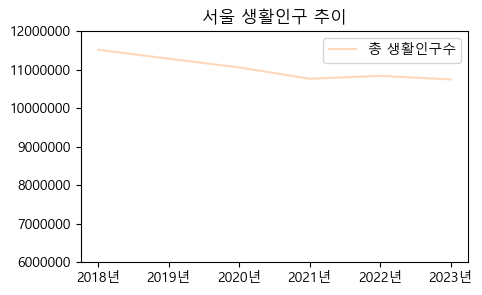

In [17]:
# 시각화 : 일일 서울 생활인구 년도별 추이
data_ss.plot(figsize=(5,3),title = '서울 생활인구 추이', color='#ffd7ba')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.ylim([6000000,12000000])
pd.options.display.float_format = '{:.8f}'.format

## 그래프 수정
- 컬럼명 변경 : 총 생활인구수 --> 일일 생활인구
- y값 : 12000000--> 12 (ylabel = 일일 생활인구(단위 : 백만(명))
- 제목 : 서울시 일일 생활인구 추이
- 선 색깔 : 파랑('dodgerblue')/ 초록 
- marker 추가
- y축 범위 변경 : 6000000:12000000-->8000000:12000000
- 스타일 : ggplot, fivethirtyeight

In [18]:
# 시각화 데이터프레임 컬럼명 수정
data_ss.head()
data_ss1 = data_ss.rename(columns={0:'일일 생활인구'})

,총 생활인구수
2018년,11519391.61438376
2019년,11286994.72011648
2020년,11060398.84678962
2021년,10768002.12109589
2022년,10841955.70779178


In [19]:
# 시각화 데이터프레임 수정
data_ss1.head()
data_ss2 = data_ss1/1000000
data_ss2

,총 생활인구수
2018년,11519391.61438376
2019년,11286994.72011648
2020년,11060398.84678962
2021년,10768002.12109589
2022년,10841955.70779178


,총 생활인구수
2018년,11.51939161
2019년,11.28699472
2020년,11.06039885
2021년,10.76800212
2022년,10.84195571
2023년,10.74934178


### 수정된 서울시 일별 평균 생활인구표 시각화

<AxesSubplot:title={'center':'서울시 일일 생활인구 추이'}>

Text(0.5, 0, '기간')

Text(0, 0.5, '백만(명)')

Text(0.5, 1.0, '서울시 일일 생활인구 추이')

(8.0, 12.0)

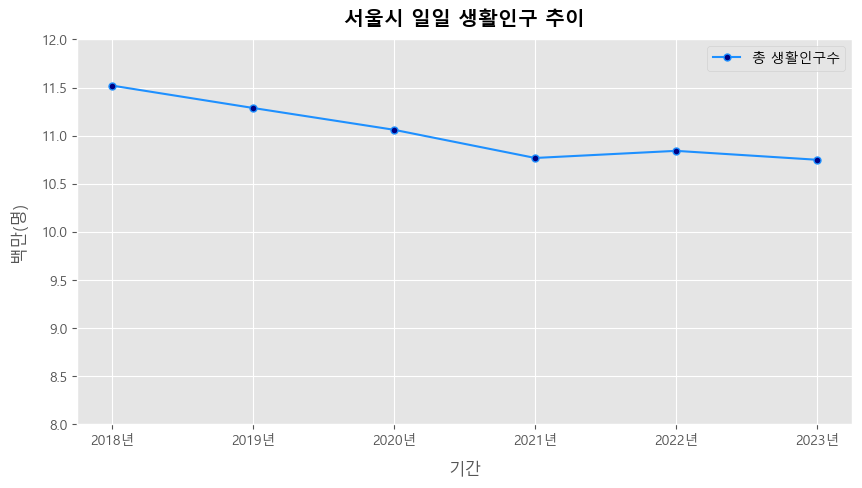

In [20]:
# 시각화 : 서울시 일일 생활인구 기간별 추이 
plt.style.use('ggplot')
data_ss2.plot(figsize=(10,5),title = '서울시 일일 생활인구 추이', color='dodgerblue', 
             marker = 'o', markersize = 5, markerfacecolor = 'navy')
plt.xlabel('기간', labelpad = 10)
plt.ylabel('백만(명)', labelpad = 10)
plt.title('서울시 일일 생활인구 추이', pad = 10, fontweight = 'bold')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.ylim([8,12])
pd.options.display.float_format = '{:.8f}'.format

plt.savefig('서울시 일일 생활인구 추이.png')

### 결론
2018년부터 2023년까지 서울시 일일 생활인구는 약하게 감소하였지만, 감소폭이 약  70만명 정도로 작기 때문에 서울시 일일 생활인구 수는 거의 유지된다고 볼 수 있음